In [1]:
import xarray as xr
import matplotlib.pyplot as plt # function in matplotlib that produces quick and easy plots
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point
import numpy as np

## (1) Writing a simple function (including some additional practice with flow control)
### (a) Write a simple function, such that
- You pass a numpy array of four numbers into it – chilly winter temperatures of 20.4, 21.6, 19.8, 22.2 (degrees F, but you don't have to worry about units)
<br><br>
- It will return the maximum value of those numbers
  - Yes, we have actual built-in functions for this - but this is good practice.  You CANNOT use the 'max' built-in function
<br><br>
- You cannot use any pre-existing functions in doing this (except range, arange, etc)
<br><br>
- For this Q, you will use logical/comparison operations, as well as flow control structures
<br><br>
- Do not hardwire anything in this function - this function should also work if you pass in an array of a different size than that of the winter temperatures in this example
<br>

### (b) 
- Actually, prove this to me by creating an array of FIVE winter temperatures of your choice and showing me that your function still works!
<br><br>

### You will NOT receive full completion credit for this assignment if your function uses any existing Python functions (beyond a function like range or arange)

In [ ]:
## a.) 

temps = np.array([20.4, 21.6, 19.8, 22.2])

def maximum(arr):
    """
    This function returns the maximum value 
    of the inputted array.
    """

    # Set variable for first value in array. 
    max_val = arr[0]

    # Loop through all values in array past first index. 
    for num in arr[1:]:
        # If num is greater than max_val, 
        # set that as the maximum value and
        # continue loop through all values. 
        if num > max_val:
            max_val = num

    return max_val

print(maximum(temps))

22.2


In [ ]:
## b.) 

temps5 = np.array([33.2, 28.9, 20.4, 31.3, 25.6])

print(maximum(temps5))

33.2


## (2) Practice with some spatial data using basic Xarray!
- You were just briefly acquainted with the Xarray package this week
<br><br>
- We'll do much more in Xarray in a few weeks, but for now I just want you to start thinking about, and working a bit with, spatial data using this package
<br><br>
- In this Q, you'll read in oceanography data - some metadata here: https://www.metoffice.gov.uk/hadobs/en4/en4-2-2-analysis-file-format.html
<br><br> 
- And evaluate a few basic characteristics of the structure of it, access elements, and then I'll create a plot for you

#### Read in 'EN.4.2.2.f.analysis.g10.202306.nc' - this is a DATASET as there are multiple data variables in it - temperature, salinity, measures of uncertainty for both, etc.

In [5]:
data = xr.open_dataset('EN.4.2.2.f.analysis.g10.202306.nc')

#### (a.)  Print the data variables in this netcdf file, using the specific function (see your Intro to Xarray lesson)

In [6]:
print(data.data_vars)

Data variables:
    temperature                      (time, depth, lat, lon) float64 21MB ...
    salinity                         (time, depth, lat, lon) float64 21MB ...
    temperature_uncertainty          (time, depth, lat, lon) float64 21MB ...
    salinity_uncertainty             (time, depth, lat, lon) float64 21MB ...
    temperature_observation_weights  (time, depth, lat, lon) float32 10MB ...
    salinity_observation_weights     (time, depth, lat, lon) float32 10MB ...
    time_bnds                        (time, bnds) datetime64[ns] 16B ...
    depth_bnds                       (depth, bnds) float32 336B ...


#### (b.)  Print the coordinates in this netcdf file

In [7]:
data.coords

Coordinates:
  * depth    (depth) float32 168B 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
  * lat      (lat) float32 692B -83.0 -82.0 -81.0 -80.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float32 1kB 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * time     (time) datetime64[ns] 8B 2023-06-16

#### (c.)   Let's focus just on temperature. 

- (i.) How many dimensions does temperature have?
<br><br>
- (ii.) What are these dimensions, and in what order are they in this variable's structure?
<br><br>
- (iii.) Access just the temperature data for the first and only time, and the first depth (aka, the vertical level of 5 m below the surface), but all latitudes and longitudes and save it to a new variable called 'temperature'.  
   - Do this using NumPy array indexing!  
   - Later, we'll use special functionality for indexing in Xarray that will allow us to no longer need to keep track of dimension order :)
<br><br>

**NOTES**
- Keep in mind: if a dimension is of length ONE, that would technically not count towards your total # of dimensions. BUT, when you index this variable in (iii.), you'll use '0' to access the one and only value of this 'dimension of length 1', since it is still part of the temperature data structure

In [9]:
# i. Temperature has 3 dimensions. 

# ii. depth, lat, lon (time not a dimension since there is only one value)

# iii. 
temperature = data['temperature'][0,0,:,:]
print(temperature)

<xarray.DataArray 'temperature' (lat: 173, lon: 360)> Size: 498kB
[62280 values with dtype=float64]
Coordinates:
    depth    float32 4B 5.022
  * lat      (lat) float32 692B -83.0 -82.0 -81.0 -80.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float32 1kB 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
    time     datetime64[ns] 8B 2023-06-16
Attributes:
    long_name:      temperature
    standard_name:  sea_water_potential_temperature
    units:          kelvin
    valid_min:      -5.0
    valid_max:      45.0


#### (d.)  I create your contour plot of June 2023 average temperature at depth = 5 m on a map for you. 
#### YOUR TASK: CAREFULLY REVIEW EACH STEP OF THIS AND ASK IF ANYTHING IS UNCLEAR AS YOU'LL BE DOING SOMETHING VERY SIMILAR ON YOUR WEEK 5 ASSIGNMENT!  PLEASE ALSO CAREFULLY WATCH YOUR 2D PLOTTING, PART II LESSON, OR RE-WATCH. MAPPING IS IMPORTANT STUFF!

Text(0.5, 1.0, 'Ocean temperature at 5 m below the surface, June 2023')

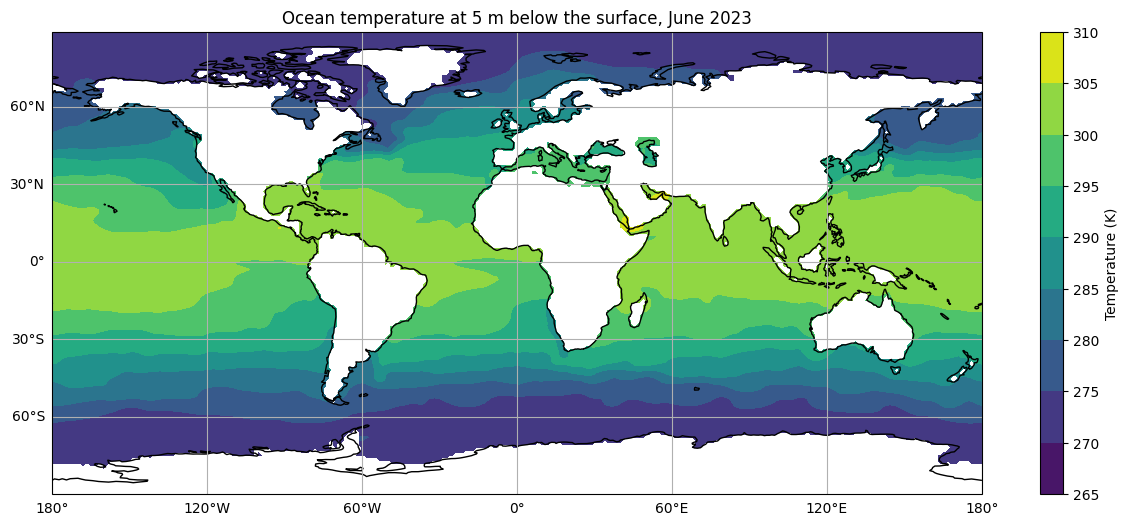

In [10]:
proj=ccrs.PlateCarree() # this is a very common projection, but not the only one!

#Create a figure with an axes object on which we will plot. Pass the projection to that axes
# Using the subplot_kw=dict(projection=proj) argument to plt.subplots tell Matplotlib that we want
# MAP AXES, for that projection, for this plot!

fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Grab our lat and lon coordinate variables from the Netcdf file
lon = data['lon']
lat = data['lat'] 

# Add cyclic point since there's a data gap in this data set at the Prime Meridian
temperature2, lon2 = add_cyclic_point(temperature, coord=lon)
# use a new variable for our now-modified temperature and longitude variables b/c if we don't and re-run just this cell
# multiple times, you'll keep adding a longitude point (oops!)

# Create our grid
# contourf needs this so it understands the grid it is plotting on
X, Y = np.meshgrid(lon2, lat) # using our slightly modified longitude

# Create our contour plot!
cs = ax.contourf(X,Y,temperature2,transform=proj) # good practice to also specify the transform, as otherwise
                                                  # Cartopy assumes your transform is whatever your projection is
                                                  # this may not always be true
                                                  # more on this later

# Create our colorbar
cb=fig.colorbar(cs,shrink=0.4) # shrink option does what it sounds like to the colorbar!
cb.set_label("Temperature (K)") # set the colorbar label
# The temperature is in Kelvin

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()

# Add a title!
ax.set_title('Ocean temperature at 5 m below the surface, June 2023')